In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colormaps
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import pyart
from pyart.testing import get_test_data
import random
import xarray as xr


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Define Output Directory
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/Radar_Meteo/HW2/'

In [3]:
# Question 1

In [4]:
# Open File
File = get_test_data('swx_20120520_0641.nc')
Radar = pyart.io.read(File)
Radar

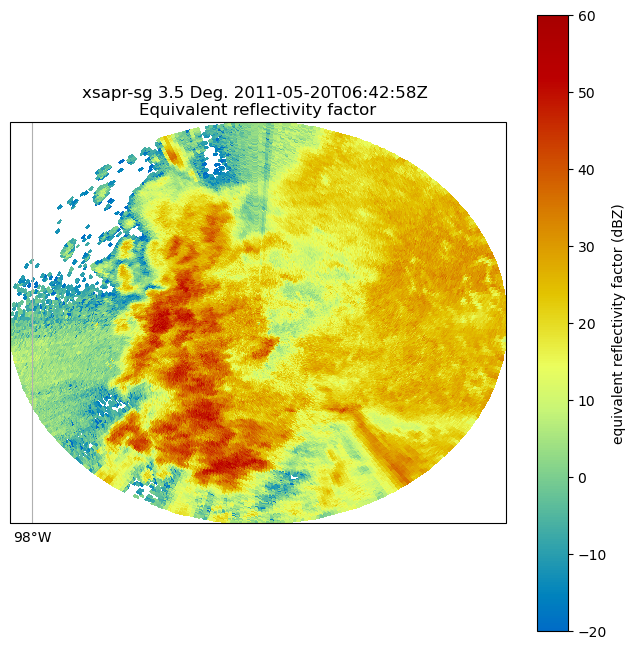

In [5]:
# Plot Reflectivity
Fig = pyplot.figure(figsize=[8,8])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('corrected_reflectivity_horizontal', sweep=3, vmin=-20, vmax=60, \
projection=ccrs.PlateCarree(), cmap='pyart_HomeyerRainbow')
pyplot.show()
Fig.savefig(Output_Diri+'Q1.1.png', bbox_inches='tight')

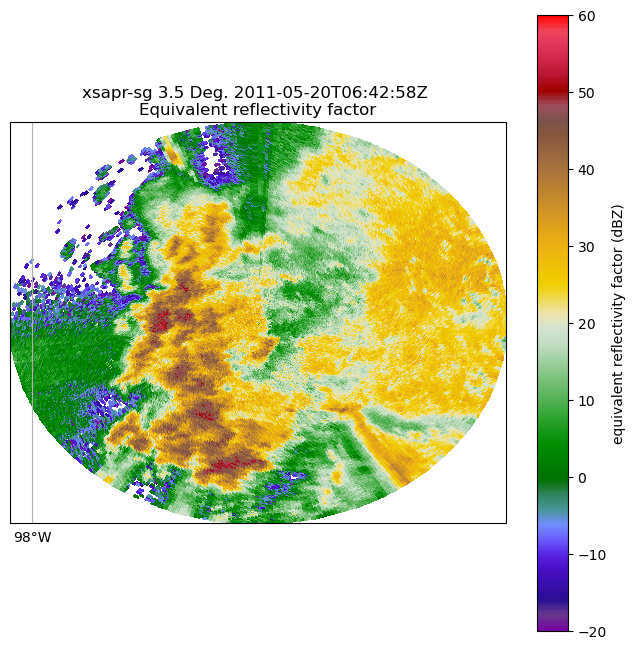

In [6]:
# Change Colour Map
Fig = pyplot.figure(figsize=[8,8])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('corrected_reflectivity_horizontal', sweep=3, vmin=-20, vmax=60, \
projection=ccrs.PlateCarree(), cmap='pyart_Carbone42')
pyplot.show()
Fig.savefig(Output_Diri+'Q1.2.png', bbox_inches='tight')

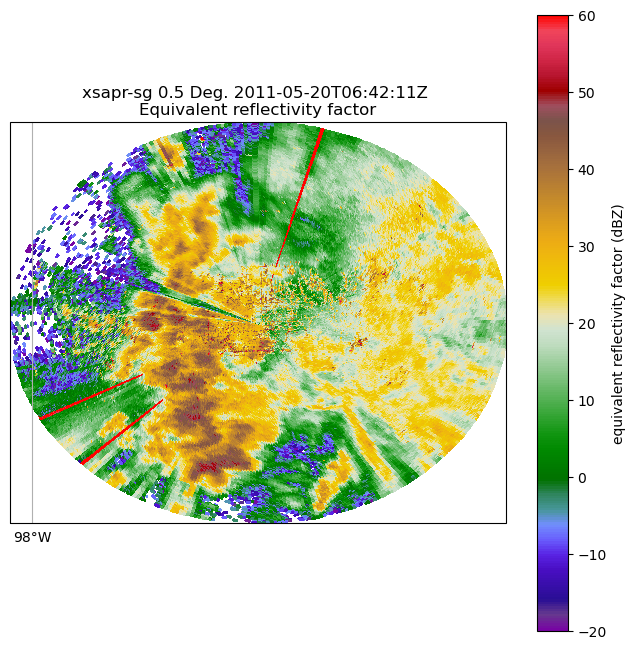

In [7]:
# Different Elevation Scan
Fig = pyplot.figure(figsize=[8,8])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('corrected_reflectivity_horizontal', sweep=0, vmin=-20, vmax=60, \
projection=ccrs.PlateCarree(), cmap='pyart_Carbone42')
pyplot.show()
Fig.savefig(Output_Diri+'Q1.3.png', bbox_inches='tight')

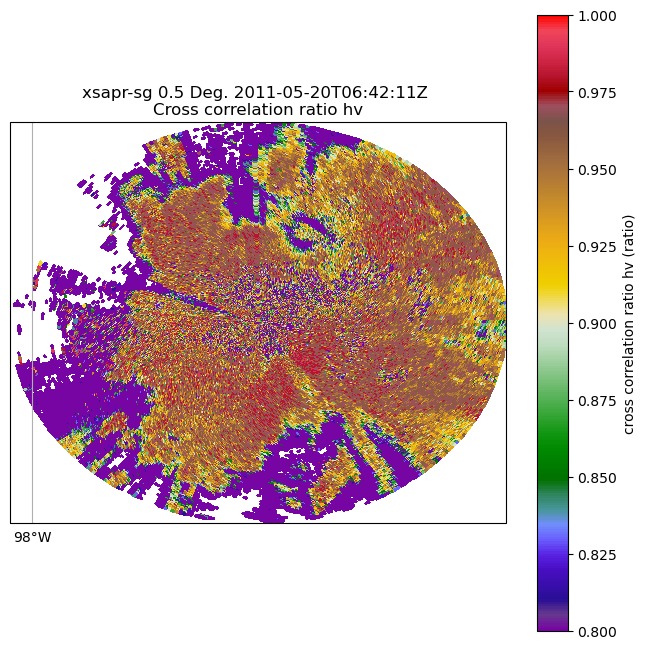

In [8]:
# Plot Correlation Coefficient
Fig = pyplot.figure(figsize=[8,8])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('copol_coeff', sweep=0, vmin=0.8, vmax=1.0, \
projection=ccrs.PlateCarree(), cmap='pyart_Carbone42')
pyplot.show()
Fig.savefig(Output_Diri+'Q1.4.png', bbox_inches='tight')

In [9]:
# Question 2

In [9]:
# Create Function to Plot Radar Data For Different Elevation Angles
def Q2(Radar, Sweep, Savefig):
    Fig = pyplot.figure(figsize=[8,8])
    Display = pyart.graph.RadarMapDisplay(Radar)
    Display.plot_ppi_map('corrected_reflectivity_horizontal', sweep=Sweep, vmin=-20, vmax=60, \
    projection=ccrs.PlateCarree(), cmap='pyart_HomeyerRainbow')
#    pyplot.xticks(numpy.arange(-98.1,-97.0,0.1))
#    pyplot.yticks(numpy.arange(36.1,37.0,0.1))
#    pyplot.xlim(-98.05,-97.14)
#    pyplot.ylim(36.12,36.86)
# Save Fig
    Figname = 'Q2.'+str(Sweep)+'.png'
    pyplot.show()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

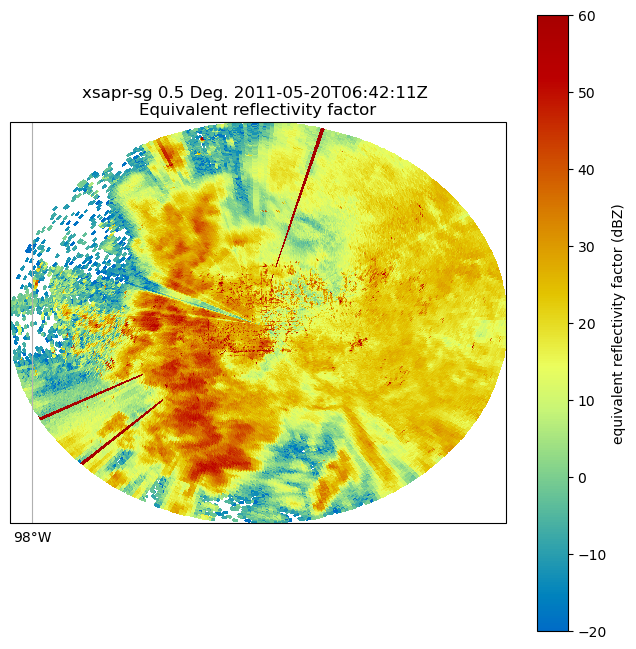

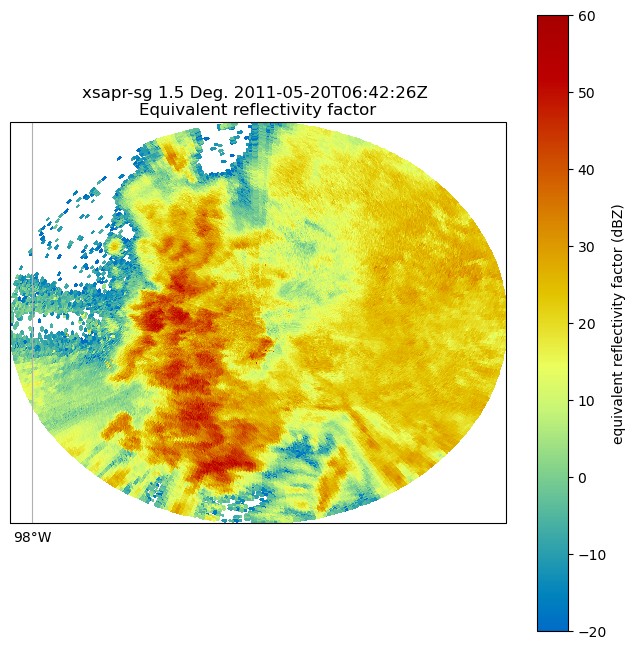

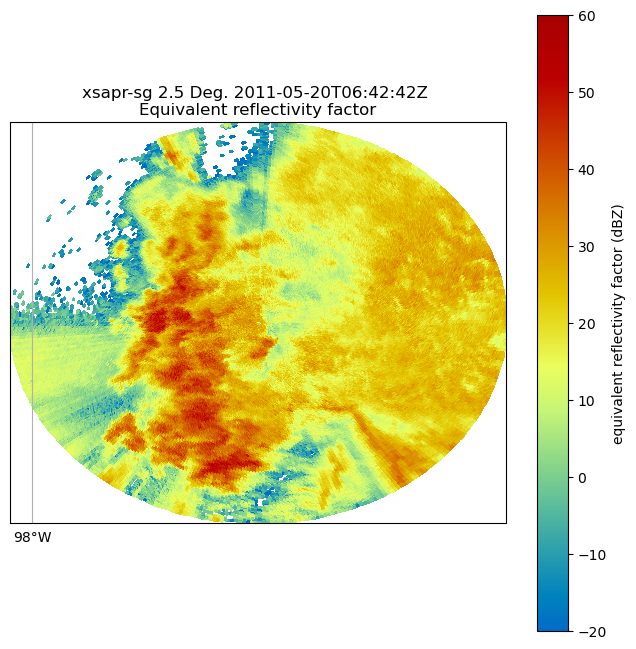

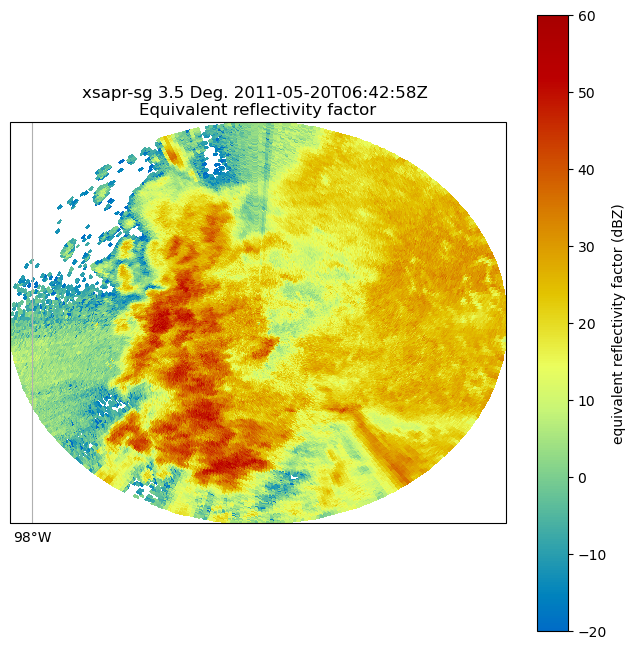

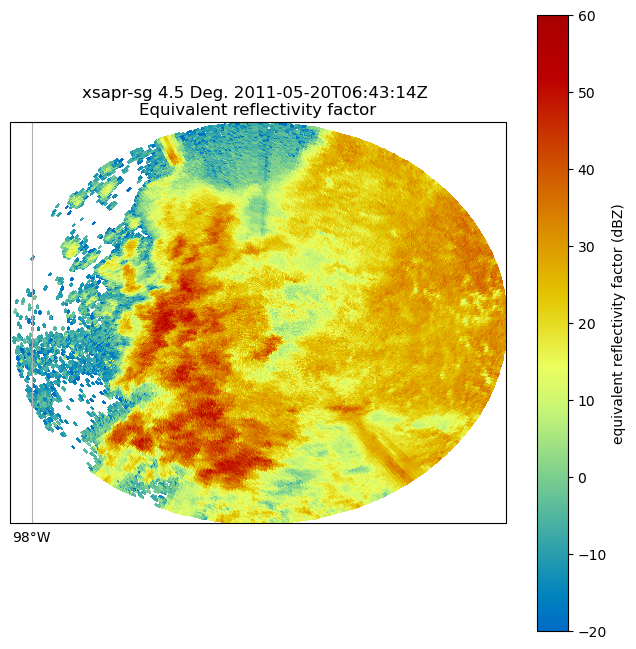

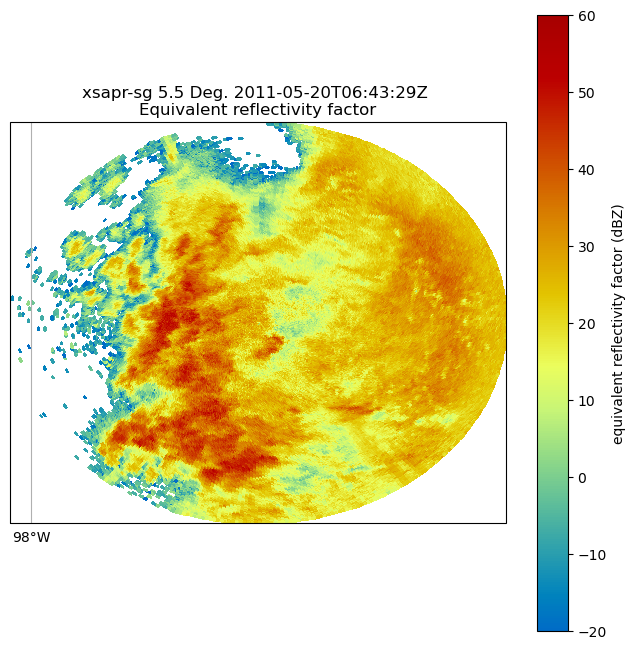

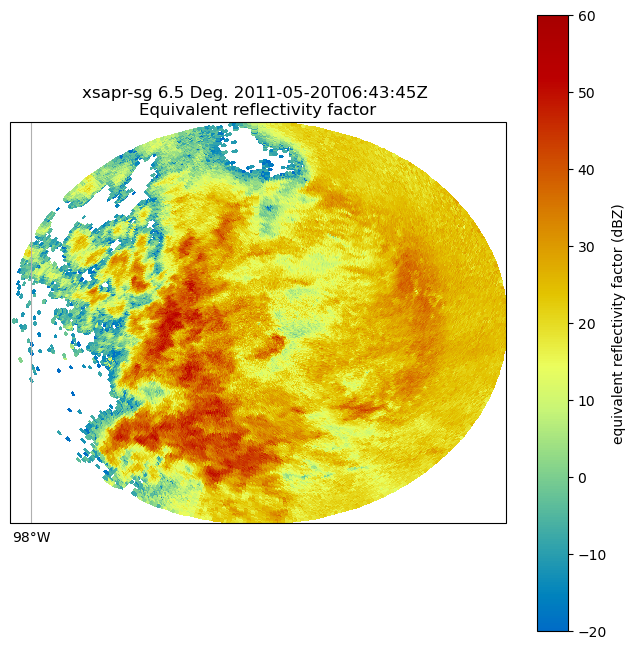

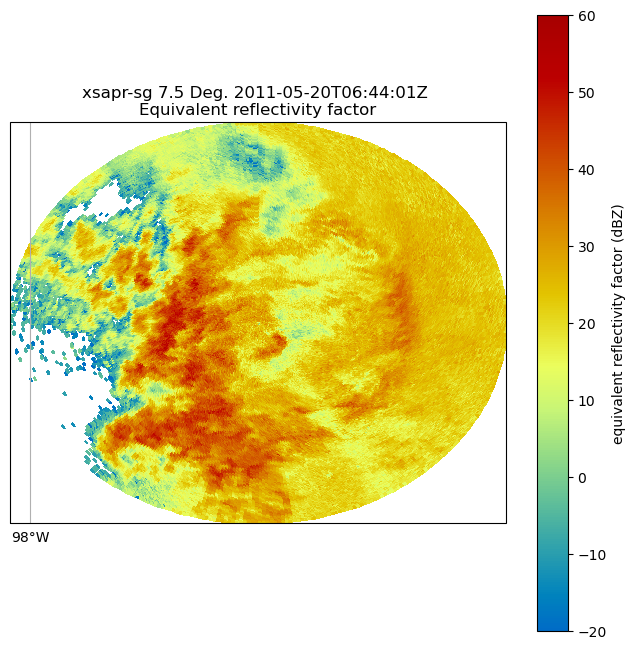

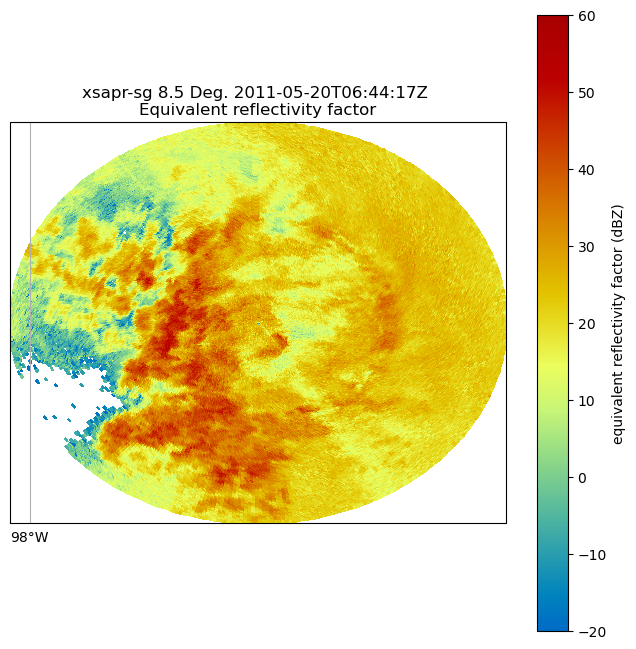

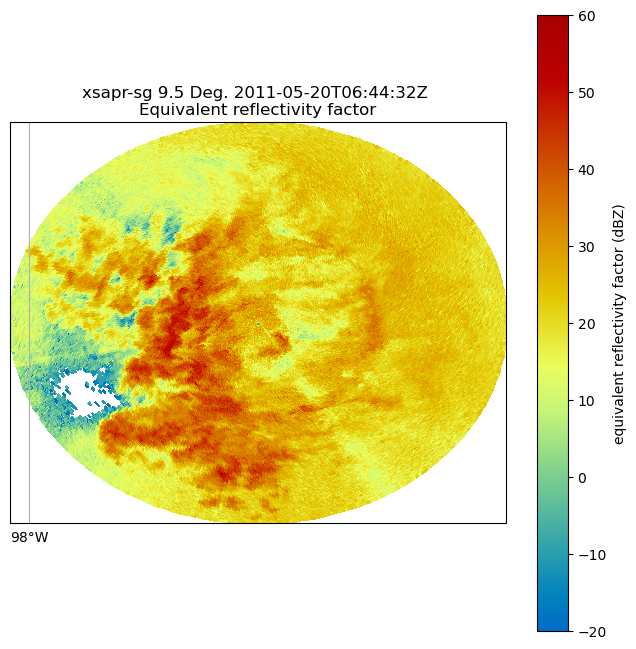

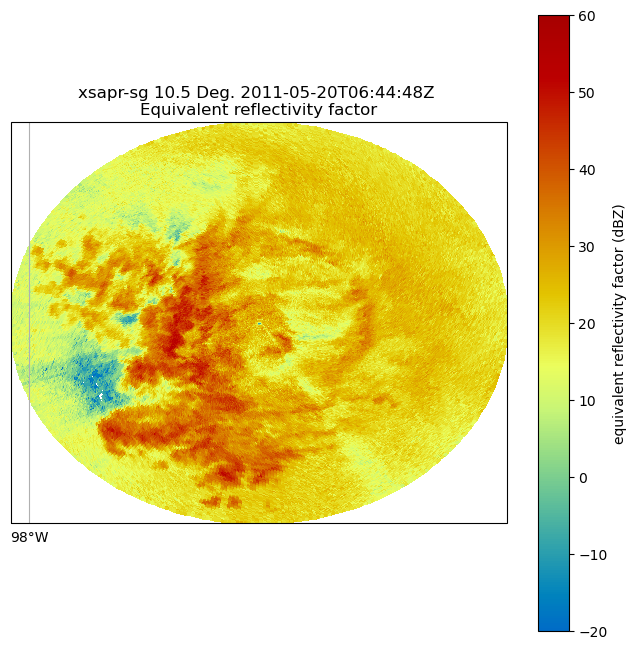

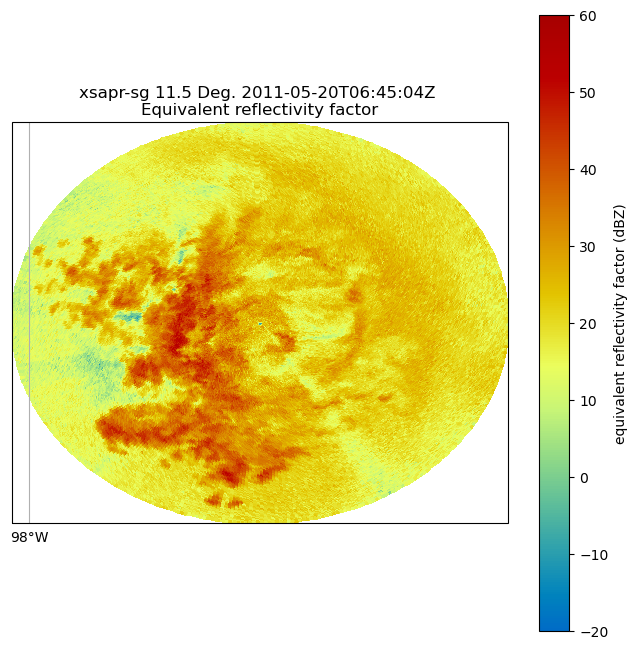

In [10]:
# Apply Function For Each of the 12 Elevation Angles
for i in range(12):
    Q2(Radar, i, True)

In [12]:
# Question 3

In [11]:
# Open File
File = get_test_data('swx_20120520_0641.nc')
Radar = pyart.io.read(File)

In [12]:
# Set Grid Extent
z_Gridlimits = (500,15000)
y_Gridlimits = (-20000,20000)
x_Gridlimits = (-20000,20000)
#
# Set Grid Resolution
Grid_Resolution = 500

In [13]:
# Calculate # of Gridpoints
def Compute_Number_of_Points(Extent, Resolution):
    return int((Extent[1] - Extent[0]) / Resolution)

In [14]:
# Apply Function
x_Gridpoints = Compute_Number_of_Points(x_Gridlimits, Grid_Resolution)
y_Gridpoints = Compute_Number_of_Points(y_Gridlimits, Grid_Resolution)
z_Gridpoints = Compute_Number_of_Points(z_Gridlimits, Grid_Resolution)
print(x_Gridpoints, y_Gridpoints, z_Gridpoints)

80 80 29


In [15]:
# Grid the Data
Grid = pyart.map.grid_from_radars(Radar, grid_shape=(z_Gridpoints, y_Gridpoints, x_Gridpoints),
grid_limits=(z_Gridlimits, y_Gridlimits, x_Gridlimits))
Grid

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


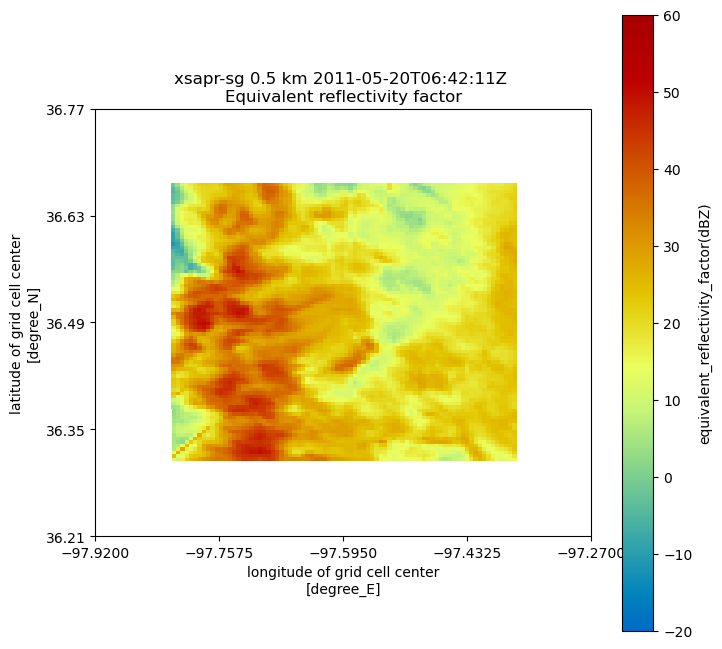

In [18]:
# Plot Horizontal View of Data
Fig = pyplot.figure(figsize=[8,8])
Display = pyart.graph.GridMapDisplay(Grid)
Display.plot_grid('corrected_reflectivity_horizontal', level=0, vmin=-20, vmax=60, cmap='pyart_HomeyerRainbow')
pyplot.show()
Fig.savefig(Output_Diri+'Q3.1.png', bbox_inches='tight')

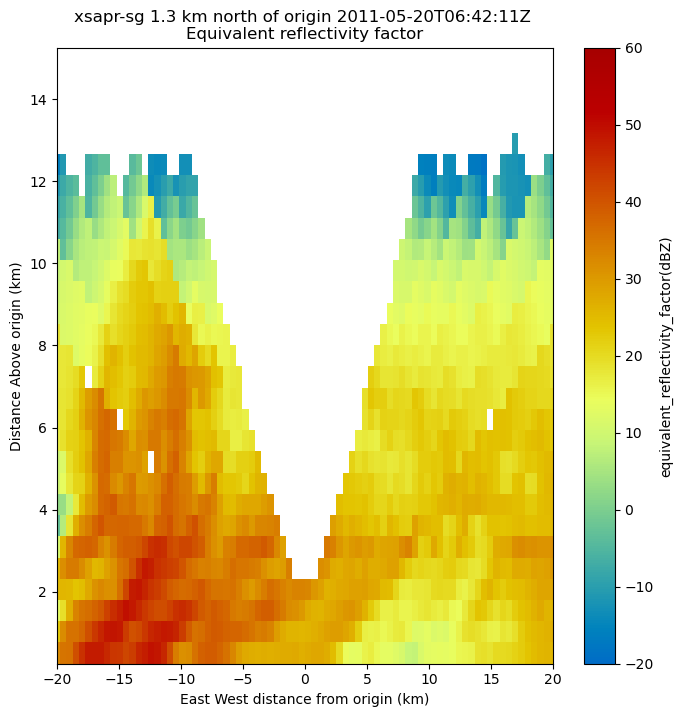

In [19]:
# Plot Latitudinal Slide
Fig = pyplot.figure(figsize=[8,8])
Display.plot_latitude_slice('corrected_reflectivity_horizontal', lat=36.5, vmin=-20, vmax=60, cmap='pyart_HomeyerRainbow')
pyplot.xlim([-20, 20])
pyplot.show()
Fig.savefig(Output_Diri+'Q3.2.png', bbox_inches='tight')

In [16]:
# Transform to xArray
Dataset = Grid.to_xarray()
Dataset

<xarray.Dataset>
Dimensions:                            (time: 1, z: 29, y: 80, x: 80)
Coordinates:
  * time                               (time) object 2011-05-20 06:42:11
  * z                                  (z) float64 500.0 1.018e+03 ... 1.5e+04
    lat                                (y, x) float64 36.31 36.31 ... 36.67
    lon                                (y, x) float64 -97.82 -97.81 ... -97.37
  * y                                  (y) float64 -2e+04 -1.949e+04 ... 2e+04
  * x                                  (x) float64 -2e+04 -1.949e+04 ... 2e+04
Data variables: (12/14)
    unf_dp_phase_shift                 (time, z, y, x) float32 66.88 ... 42.07
    recalculated_diff_phase            (time, z, y, x) float32 0.3767 ... 0.0...
    mean_doppler_velocity              (time, z, y, x) float32 -11.43 ... 1.22
    norm_coherent_power                (time, z, y, x) float32 0.2725 ... 0.0...
    diff_phase                         (time, z, y, x) float32 0.3938 ... nan
    copol_coeff                        (time, z, y, x) float32 0.5355 ... nan
    ...                                 ...
    dp_phase_shift                     (time, z, y, x) float32 153.0 ... nan
    specific_attenuation               (time, z, y, x) float32 0.007137 ... 0.0
    proc_dp_phase_shift                (time, z, y, x) float32 67.05 ... 42.07
    reflectivity_horizontal            (time, z, y, x) float32 -3.618 ... nan
    corrected_reflectivity_horizontal  (time, z, y, x) float32 11.35 ... nan
    ROI                                (time, z, y, x) float32 765.6 ... 1.49...

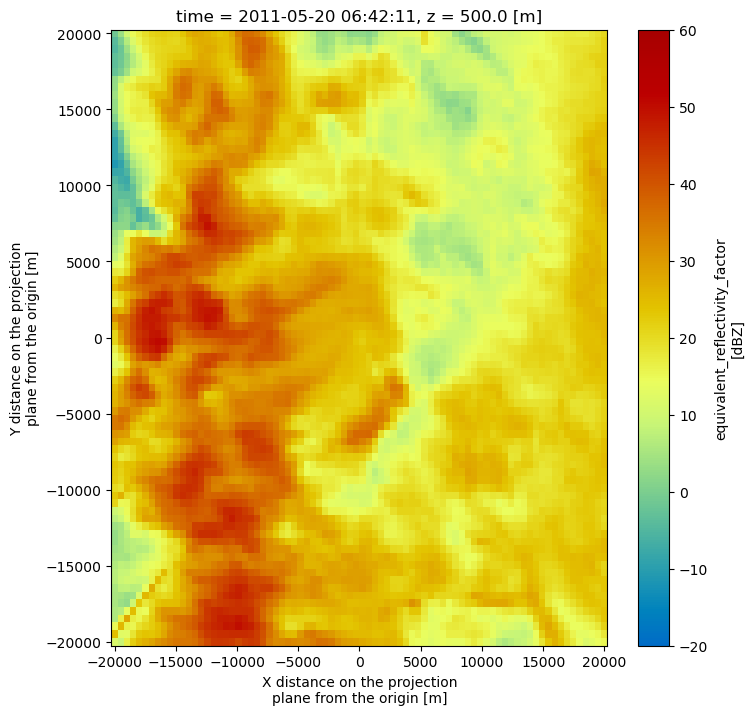

In [17]:
# Plot Horizontal Slice
Fig = pyplot.figure(figsize=[8,8])
Dataset.isel(z=0).corrected_reflectivity_horizontal.plot(cmap='pyart_HomeyerRainbow', vmin=-20, vmax=60)
pyplot.show()
Fig.savefig(Output_Diri+'Q3.3.png', bbox_inches='tight')

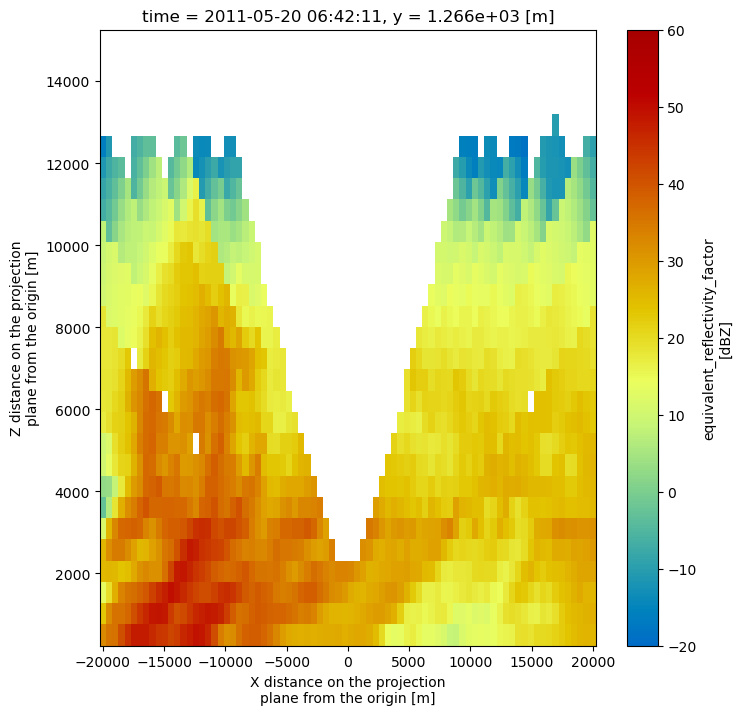

In [22]:
# Plot Vertical Slice
Fig = pyplot.figure(figsize=[8,8])
Dataset.sel(y=1300,method='nearest').corrected_reflectivity_horizontal.plot(cmap='pyart_HomeyerRainbow', vmin=-20, vmax=60)
pyplot.show()
Fig.savefig(Output_Diri+'Q3.4.png', bbox_inches='tight')

In [23]:
# Question 4

In [24]:
# Create Function to Plot Gridded Radar Data For Different Altitudes
def Q4(Grid, Level, Savefig):
    Fig = pyplot.figure(figsize=[8,8])
    Display = pyart.graph.GridMapDisplay(Grid)
    Display.plot_grid('corrected_reflectivity_horizontal', level=Level, vmin=-20, vmax=60, \
    cmap='pyart_HomeyerRainbow')
    pyplot.xticks(numpy.arange(-97.85,-97.35,0.05))
    pyplot.yticks(numpy.arange(36.3,36.7,0.05))
    pyplot.xlim(-97.82,-97.37)
    pyplot.ylim(36.31,36.67)
# Save Fig
    Figname = 'Q4.'+str(Level)+'.png'
    pyplot.show()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


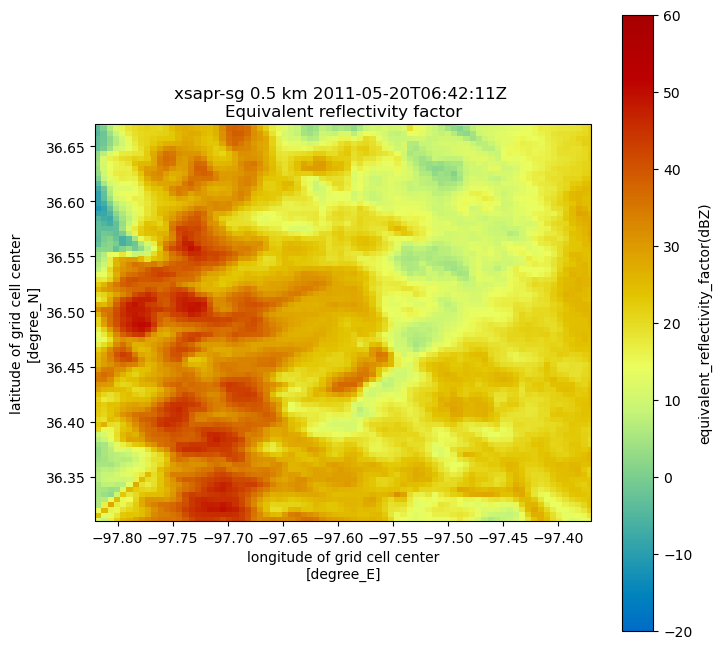

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


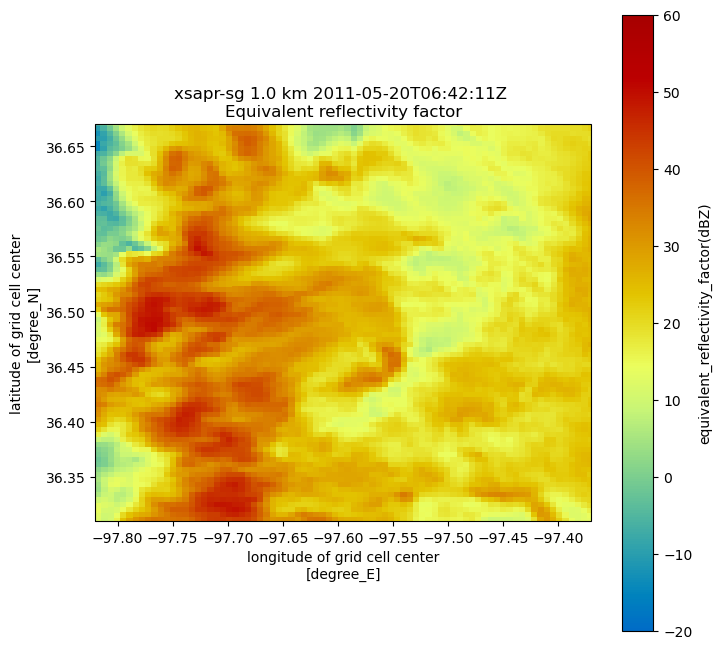

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


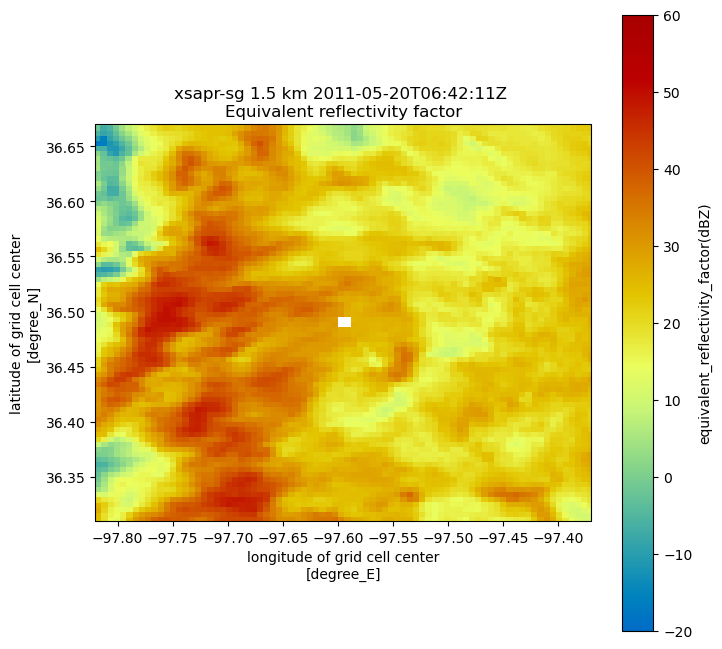

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


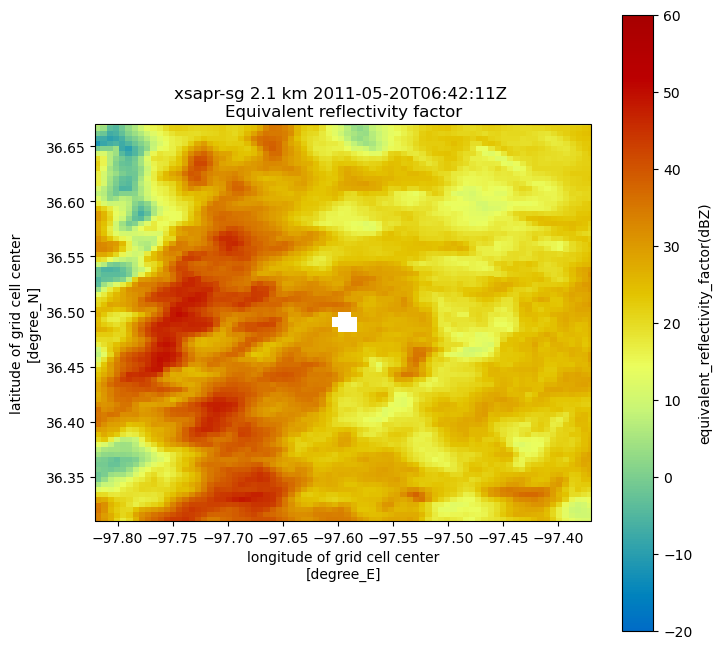

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


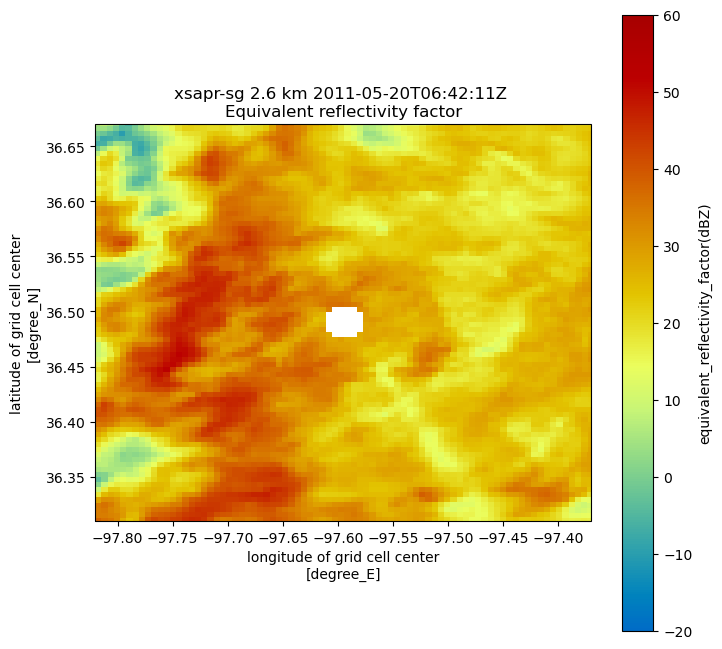

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


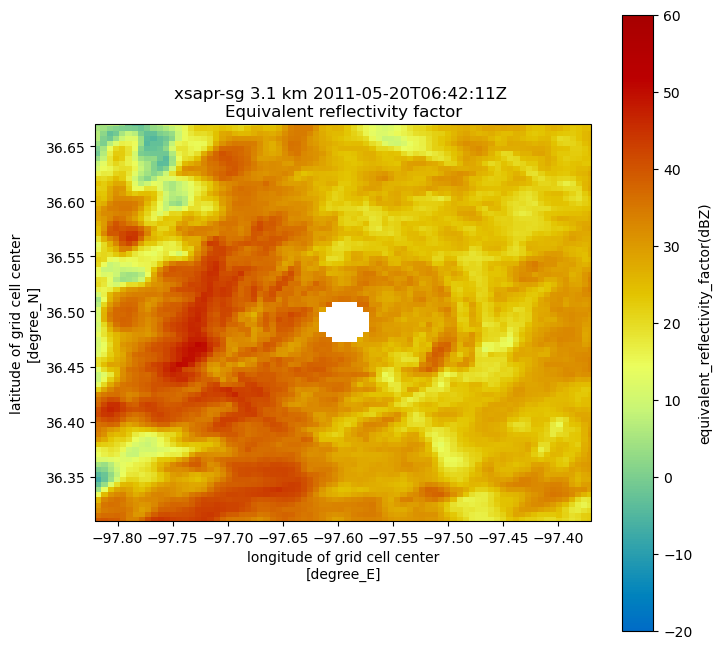

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


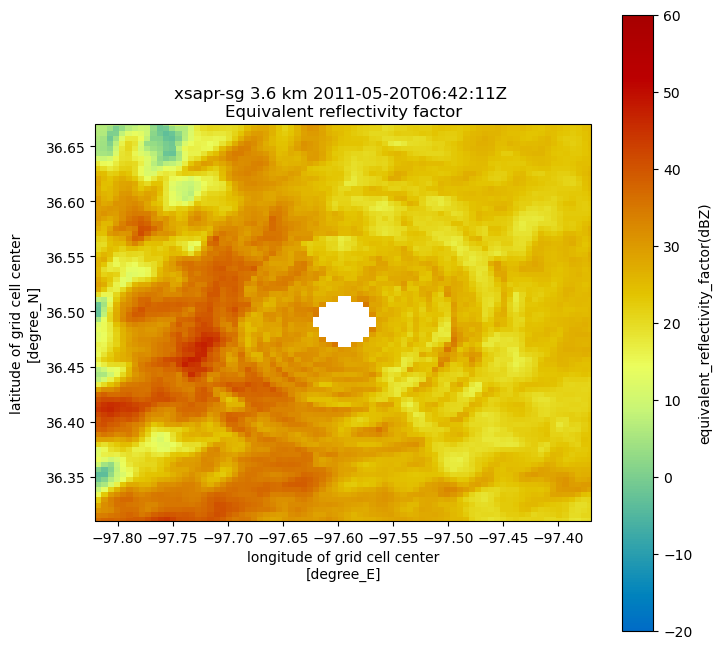

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


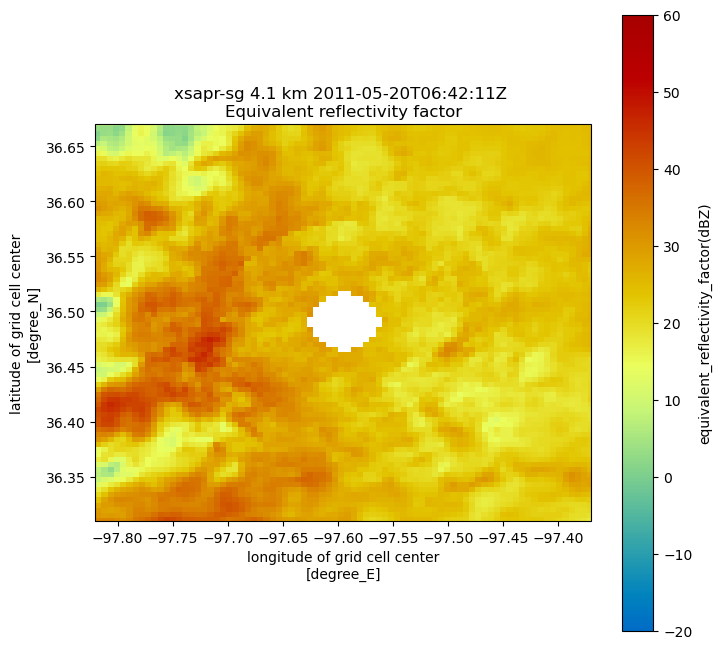

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


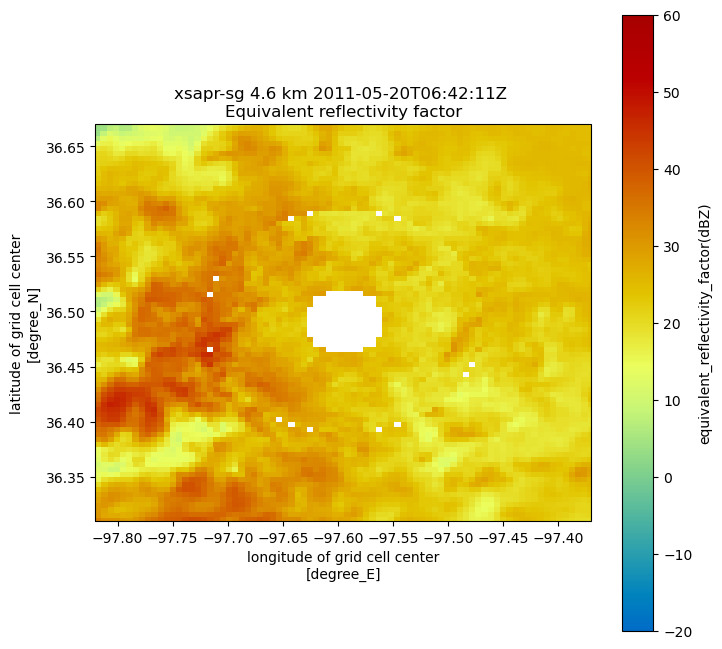

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


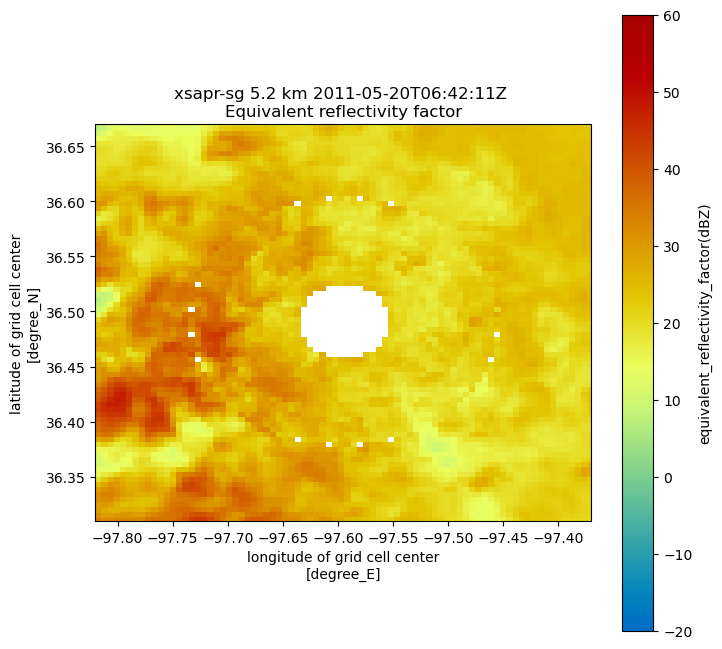

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


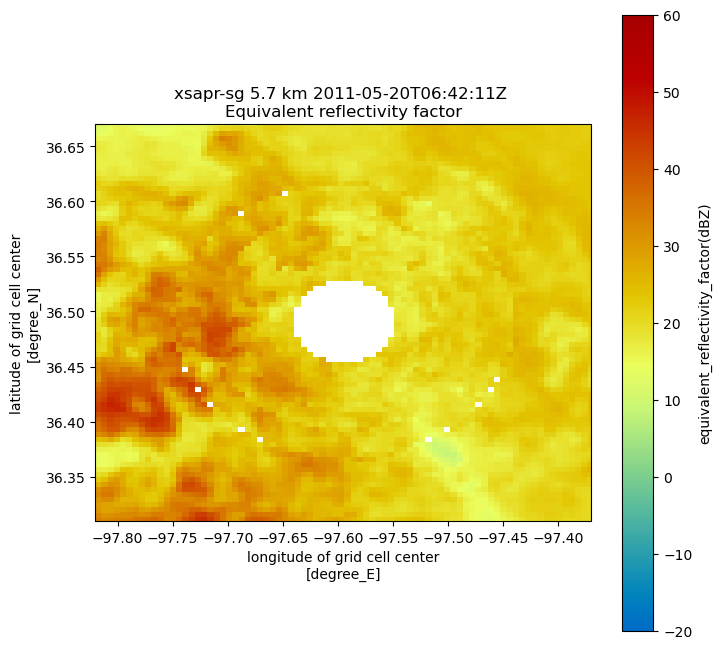

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


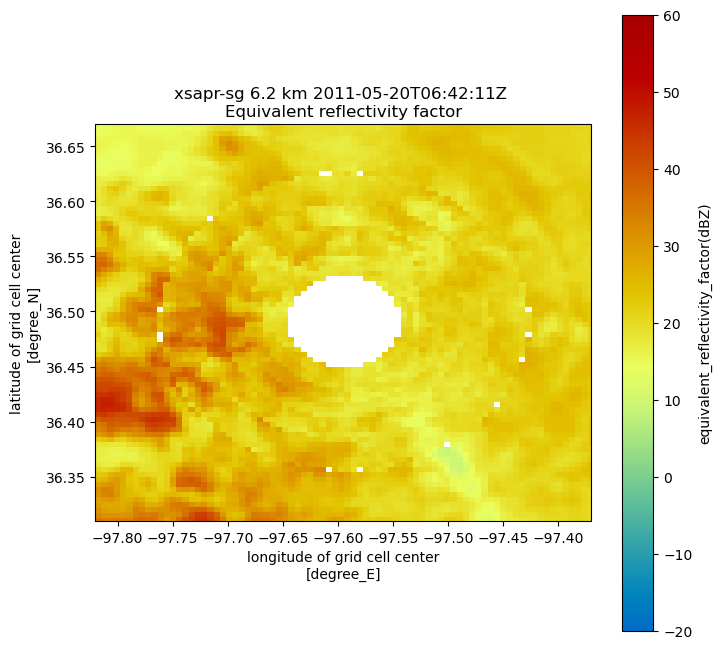

In [25]:
# Apply Function For Each of the 12 Altitudes
for i in range(12):
    Q4(Grid, i, True)